# Visualising ND data

Unfortunately, human brains are not the best at visualising higher dimensions. To understand high dimensional data is its own course, and libraries like `sklearn` have many algorithms for finding structure in high dimensional data and showing you those relationships in lower dimensional plots.

For this section, we're going to use the heart data agin (https://www.kaggle.com/ronitf/heart-disease-uci), plus we're going to make some data ourselves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import manifold

df = pd.read_csv("heart.csv")
target = df["target"].to_numpy()
df = df[["age", "sex", "cp", "trestbps", "chol", "thalach"]]
df.head()

,age,sex,cp,trestbps,chol,thalach
0,63,1,3,145,233,150
1,37,1,2,130,250,187
2,41,0,1,130,204,172
3,56,1,1,120,236,178
4,57,0,0,120,354,163


## Scatter Matrix

This is the easiest and most commonly used way of visualising ND data. It works by breaking it down to many 2D surfaces.

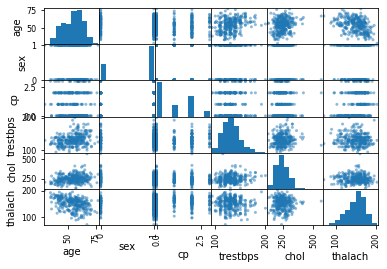

In [2]:
pd.plotting.scatter_matrix(df);

## Correlation Matrix

A very quick view of how much each parameter (column) is correlated with another. 

In [3]:
df.corr()

,age,sex,cp,trestbps,chol,thalach
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,-0.398522
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,-0.044020
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.295762
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,-0.046698
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,1.000000


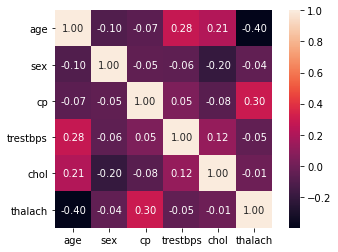

In [6]:
ax = sb.heatmap(df.corr(), annot=True, fmt="0.2f", square=True);

## What about more complicated methods?

So let's generate a 4-dimensional spiral and see what we can do

In [8]:
np.random.seed(0)
n = 2000
t = np.linspace(0, 20, n)
x = t * np.sin(t) + 0.2 * np.random.normal(size=n)
y = t * np.cos(t) + 0.2 * np.random.normal(size=n)
z = np.log(t + 1) * np.sin(np.sqrt(t)) + 0.1 * np.random.normal(size=n)
a = np.log(t + 1) * np.cos(np.sqrt(t)) + 0.1 * np.random.normal(size=n)

df2 = pd.DataFrame({"x": x, "y": y, "z": z, "a": a})
data = df2.to_numpy()

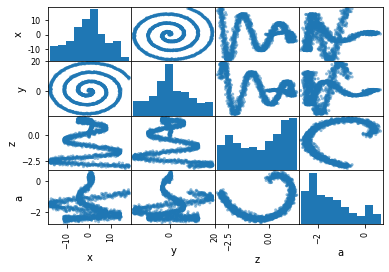

In [9]:
pd.plotting.scatter_matrix(df2);

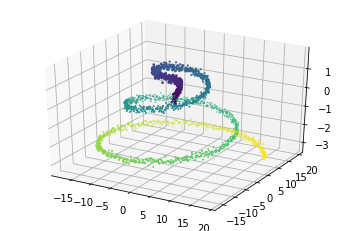

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=t, s=3+a)

So, its an interesting pattern, and we can see some clear relationships on some of the slices, but not all of them.

## Manifold Learning

There are lots of techniques we could use, but I think manifold learning is the best. See https://scikit-learn.org/stable/modules/manifold.html for all of the easy to use `sklearn` implementations. Note that the next section closely follows the sklearn example, so I'd recommend having a look at that link if you want to know more.

Running LLE
Running LTSA
Running Hessian LLE
Running Modified LLE
Running Isomap
Running MDS
Running SE
Running t-SNE


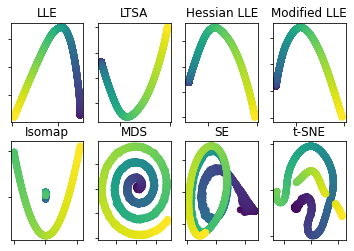

In [12]:
methods = [
    ("LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='standard')),
    ("LTSA", manifold.LocallyLinearEmbedding(n_neighbors=20, method='ltsa')),
    ("Hessian LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='hessian')),
    ("Modified LLE", manifold.LocallyLinearEmbedding(n_neighbors=20, method='modified')),
    ("Isomap", manifold.Isomap()),
    ("MDS", manifold.MDS(n_init=1)),
    ("SE", manifold.SpectralEmbedding()),
    ("t-SNE", manifold.TSNE()),
]

fig, axes = plt.subplots(nrows=2, ncols=4)
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    Y = method.fit_transform(data)
    ax.scatter(Y[:, 0], Y[:, 1], c=t)
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Running LLE
Running LTSA
Running Hessian LLE
Method Hessian LLE failed
Running Modified LLE


c:\users\finwl\appdata\local\programs\python\python38\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:937: LinAlgWarning: Diagonal number 86 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


Running Isomap
Running MDS
Running SE
Running t-SNE


<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
c:\users\finwl\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


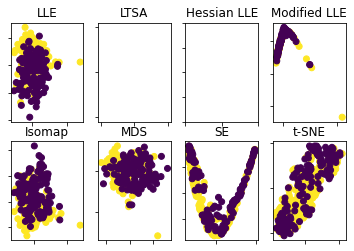

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=4)
for (name, method), ax in zip(methods, axes.flatten()):
    print(f"Running {name}")
    try:
        Y = method.fit_transform(df.to_numpy())
        ax.scatter(Y[:, 0], Y[:, 1], c=target)
    except Exception:
        print(f"Method {name} failed")
    ax.set_title(name)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

### Recap

* scatter_matrix
* sb.pairplot
* correlation matrix
* Manifold learning (or other ways of compressing dimensionality)